In [1]:
from dataset import SNPmarkersDataset
from Regression.LassoNet.lassonet.lassonet.interfaces import LassoNetRegressor
from torch.optim import Adam
from functools import partial

In [2]:
selected_phenotype = "ep_res"

train_dataset = SNPmarkersDataset(mode="local_train", skip_check=True)
train_dataset.set_phenotypes = selected_phenotype
train_X = train_dataset.get_all_SNP()
train_Y = train_dataset.phenotypes[selected_phenotype]

validation_dataset = SNPmarkersDataset(mode="validation", skip_check=True)
validation_dataset.set_phenotypes = selected_phenotype
validation_X = validation_dataset.get_all_SNP()
validation_Y = validation_dataset.phenotypes[selected_phenotype]

print(f"Train X shape {train_X.shape}")
print(f"Train Y shape {train_Y.shape}")
print(f"Validation X shape {validation_X.shape}")
print(f"Validation Y shape {validation_Y.shape}")

Train X shape (1000, 36304)
Train Y shape (1000,)
Validation X shape (1000, 36304)
Validation Y shape (1000,)


In [3]:
model = LassoNetRegressor(
    hidden_dims=(8,),
    batch_size= 16,
    optim = partial(Adam, lr= 1e-3),
    device="cpu",
    n_iters=50,
    dropout=0.25,
    lambda_seq= [1, 1.5, 2]
)

output = model.path(X=train_X, y=train_Y, X_val=validation_X, y_val=validation_Y, return_state_dicts=True)

/mnt/c/Users/vince/Documents/Florent/Universite/Master 2/Master thesis/Code/Regression/LassoNet/lassonet/lassonet/interfaces.py:491: UserWarning: lambda_start=1.000 (selected automatically) might be too large.
Features start to disappear at current_lambda=1.000.
  warnings.warn(


Final training epoch 41 for lambda 1.50000 finished. Train loss: 1.637. Validation objective: 1.448


/mnt/c/Users/vince/Documents/Florent/Universite/Master 2/Master thesis/Code/Regression/LassoNet/lassonet/lassonet/interfaces.py:588: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return pearsonr(y.cpu(), y_pred.cpu().detach()).statistic


In [4]:
for item in output:
    print("////////////////////////////////////////")
    print(f"Lambda: {item.lambda_}")
    print(f"Train loss: {item.loss}")
    print(f"Val objectif: {item.val_objective}")
    print(f"Correlation: {item.correlation}")
    print(f"Nb features: {sum(item.selected)}")

////////////////////////////////////////
Lambda: 0
Train loss: 1.953408361434936
Val objectif: 2.314103364944458
Correlation: 0.16411086150498405
Nb features: 36304
////////////////////////////////////////
Lambda: 1
Train loss: 1.8361901264190672
Val objectif: 1.7685516173951328
Correlation: 0.17610387150375978
Nb features: 64
////////////////////////////////////////
Lambda: 1.5
Train loss: 1.6369873819351197
Val objectif: 1.448375940322876
Correlation: nan
Nb features: 0


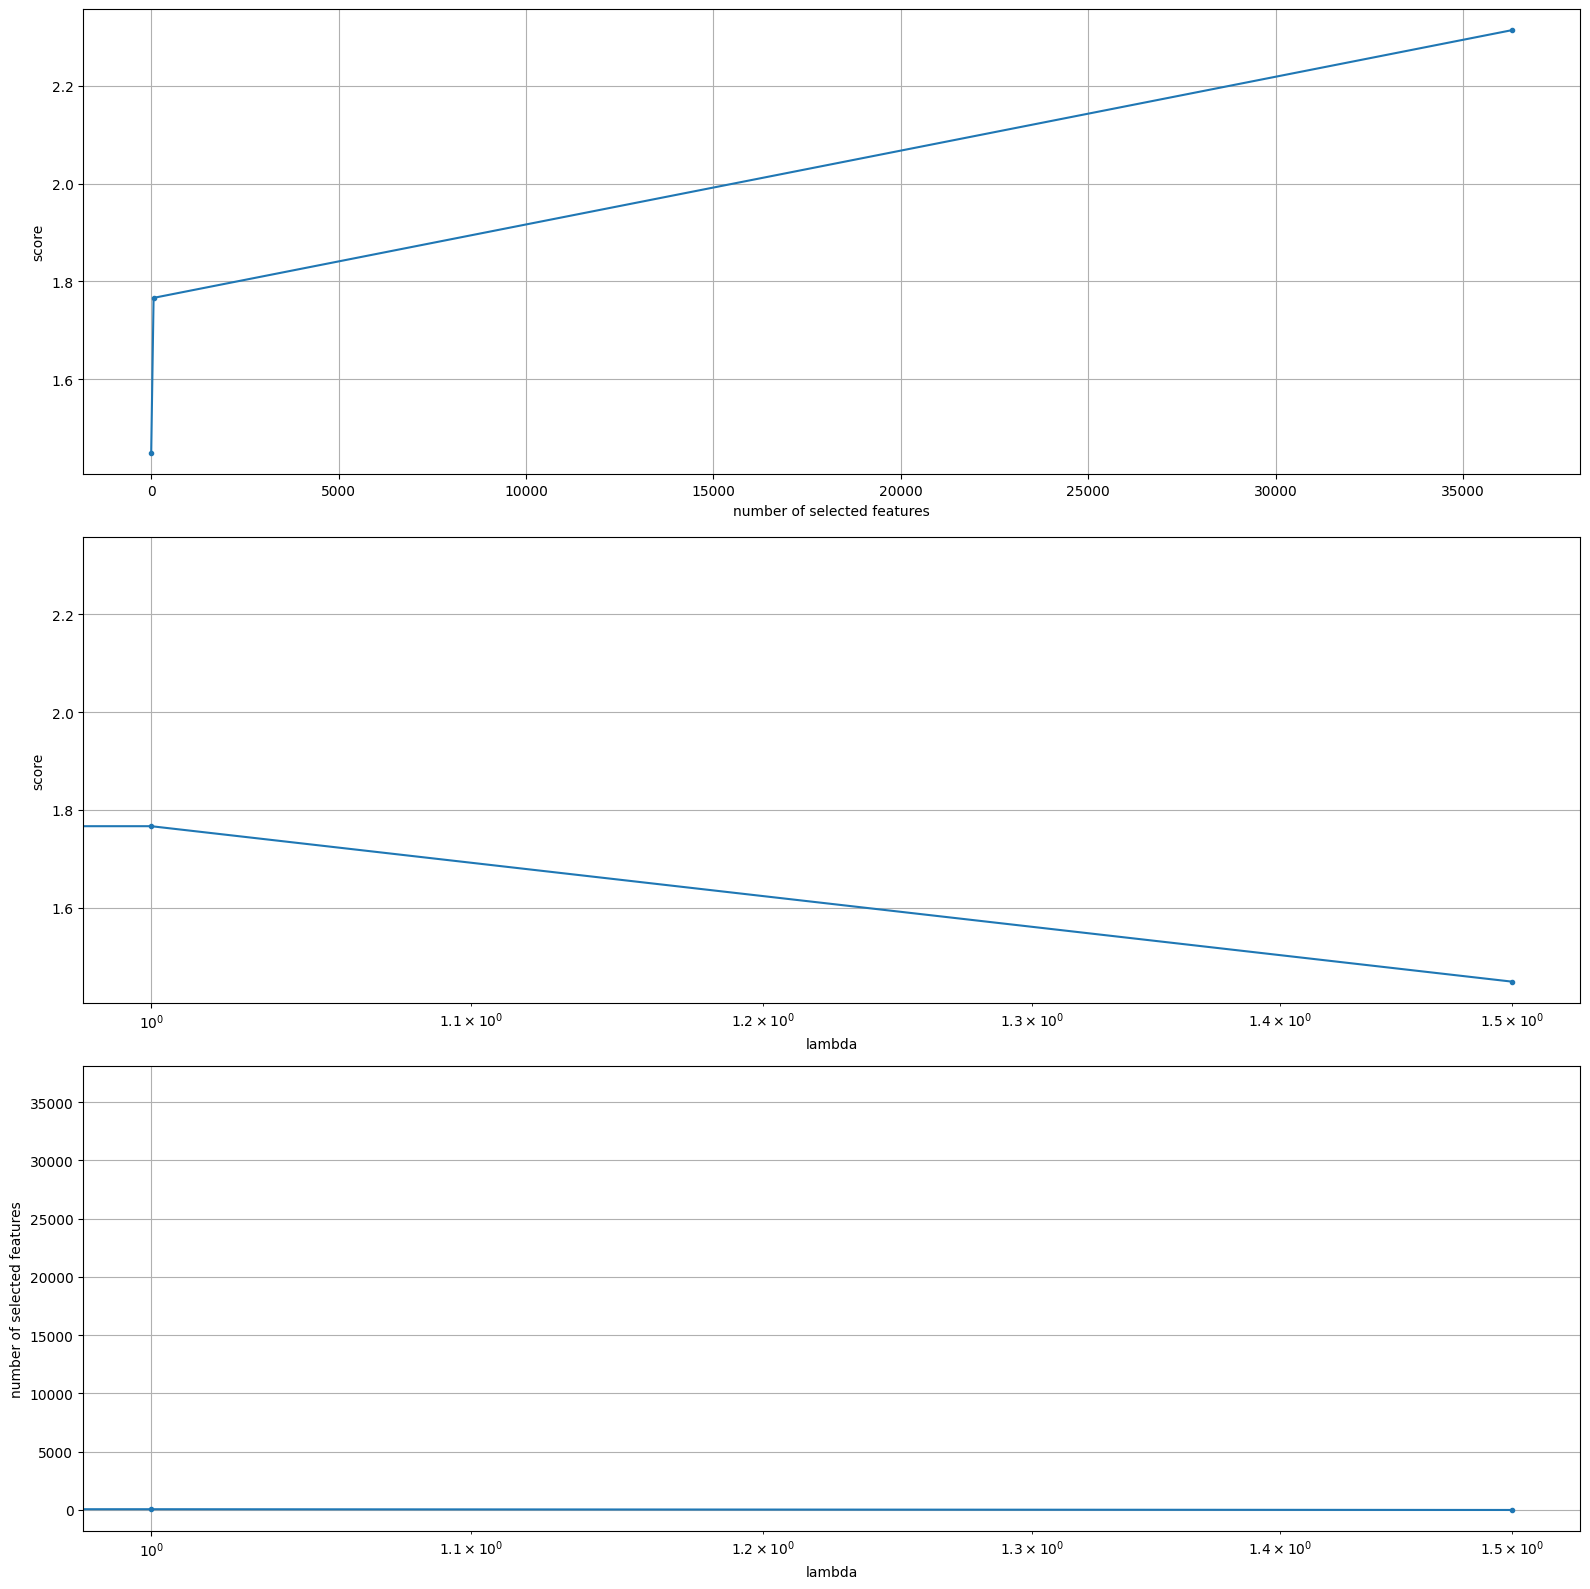

In [5]:
from Regression.LassoNet.lassonet.lassonet.plot import plot_path
from sklearn.metrics import mean_absolute_error
%matplotlib inline

plot_path(model, output, validation_X, validation_Y, score_function=mean_absolute_error)